#### [ 타이타닉 데이터 분석 및 시각화 ]
- 생존자 중 성별 비율 시각화
- 나이별 생존자의 성별 비율 비교 시각화

In [1047]:
# [1] 생존자 중 성별 비율 시각화

"""
1. 결측치 검사 및 제거
2. 중복값 검사 및 제거
3. 기타 전처리
4. 멀티인덱스로 생존자와 성별 묶기
5. 바 그래프로 x축은 성별, y축은 생존자 수
"""

'\n1. 결측치 검사 및 제거\n2. 중복값 검사 및 제거\n3. 기타 전처리\n4. 멀티인덱스로 생존자와 성별 묶기\n5. 바 그래프로 x축은 성별, y축은 생존자 수\n'

In [1048]:
# 모듈 삽입
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
import numpy as np


In [1049]:
# 폰트 적용

font_path = "MALGUN.TTF"
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [1050]:
# 데이터 불러오기
DATA_PATH = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\Data\titanic.csv"
data = pd.read_csv(DATA_PATH)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [1051]:
# 데이터 정보 확인하기
data.info()

data["survived"]
data["sex"]

# 사용할 열은 survived와 sex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [1052]:
# 결측치 확인 및 제거
print(data["survived"].isna().sum())
print(data["sex"].isna().sum())

# 0개이므로 처리 X

0
0


In [1053]:
# 중복값 검사 및 제거
data.duplicated().sum()

# 인물을 특정지을 수 있는 열이 아니라고 판단하여 충분히 중복이 있을 수 있다고 판단해 제거 X

np.int64(107)

In [1054]:
# 사용할 survived, sex열을 제외하고 삭제 후, 내부의 값들 확인
data[["survived", "sex"]]

,survived,sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [1055]:
# 생존자 수 확인
survived_people = (data["survived"] == 1).sum()

In [1056]:
# 성별 별 생존자 비율 구하기
survived_male = round(((data["survived"] == 1) & (data["sex"] == "male")).sum() / survived_people * 100, 2)
survived_female = round(((data["survived"] == 1) & (data["sex"] == "female")).sum() / survived_people * 100, 2)

print(survived_male)
print(survived_female)

31.87
68.13


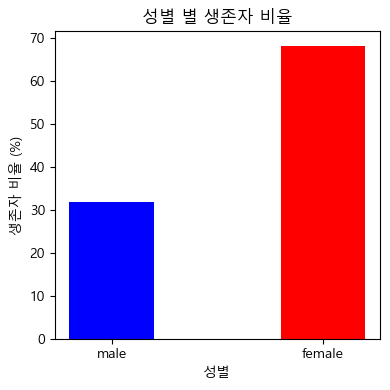

In [1057]:
# 성별 별 생존자 비율 그래프 그리기
colors = ["blue", "red"]

plt.figure(figsize = (4, 4))
plt.bar(["male", "female"], [survived_male, survived_female], width = 0.4, color = colors)
plt.title("성별 별 생존자 비율")
plt.xlabel("성별")
plt.ylabel("생존자 비율 (%)")
plt.tight_layout()
plt.show()

In [1058]:
# [2] 나이별 생존자의 성별 비율 비교 시각화

'\n1. 결측치 검사 및 제거\n2. 중복값 검사 및 제거\n3. 기타 전처리\n4. 멀티인덱스로 생존자와 나이 묶기\n5. 바 그래프로 x축은 성별, y축은 생존자 수\n'

In [1059]:
# 사용할 열 sex, age, survived 추출 후 결측치 제거
data2 = data[["sex", "age", "survived"]].copy()
data2.isna().sum()
data2.dropna(inplace = True)

In [1060]:
data2["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [1061]:
interval_index = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

data2["age"] = pd.cut(data2["age"], 
                      bins = interval_index,
                      labels = ["애기", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대"],
                      right = False)
data2

,sex,age,survived
0,male,20대,0
1,female,30대,1
2,female,20대,1
3,female,30대,1
4,male,30대,0
...,...,...,...
885,female,30대,0
886,male,20대,0
887,female,10대,1
889,male,20대,1


In [1062]:
data3 = data2.groupby(["sex", "age"]).sum()
data3

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\1518737054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data3 = data2.groupby(["sex", "age"]).sum()


survived
sex    age          
female 애기         19
       10대        34
       20대        52
       30대        50
       40대        22
       50대        16
       60대         4
       70대         0
       80대         0
male   애기         19
       10대         7
       20대        25
       30대        23
       40대        12
       50대         4
       60대         2
       70대         0
       80대         1

In [1063]:
((data2["age"] == "애기") & (data2["survived"] == 1)).sum()

np.int64(38)

In [1064]:
age_list = []

for sex, age in data3.index:
    age_list.append(age)

age_list = age_list[:9]
age_list

['애기', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [1065]:
male_list = []
female_list = []

for i in range(len(age_list)):
    male_list.append(round(((data2["sex"] == "male") & (data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() / ((data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() * 100, 2))
    female_list.append(round(((data2["sex"] == "female") & (data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() / ((data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() * 100, 2))
    
print(male_list)
print(female_list)

[np.float64(50.0), np.float64(17.07), np.float64(32.47), np.float64(31.51), np.float64(35.29), np.float64(20.0), np.float64(33.33), np.float64(nan), np.float64(100.0)]
[np.float64(50.0), np.float64(82.93), np.float64(67.53), np.float64(68.49), np.float64(64.71), np.float64(80.0), np.float64(66.67), np.float64(nan), np.float64(0.0)]


C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\1571897547.py:5: RuntimeWarning: invalid value encountered in scalar divide
  male_list.append(round(((data2["sex"] == "male") & (data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() / ((data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() * 100, 2))
C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\1571897547.py:6: RuntimeWarning: invalid value encountered in scalar divide
  female_list.append(round(((data2["sex"] == "female") & (data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() / ((data2["age"] == age_list[i]) & (data2["survived"] == 1)).sum() * 100, 2))


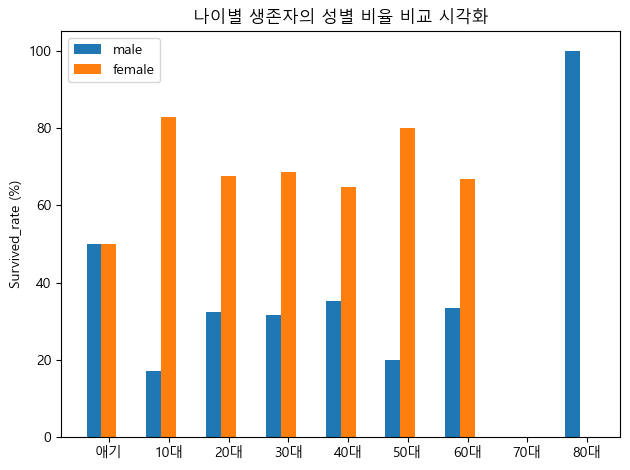

In [1066]:
sex_dict = {"male" : male_list,
            "female" : female_list}

width = 0.25
multiplier = 0
x = np.arange(len(age_list))

for sex, rate in sex_dict.items():
    offset = width * multiplier
    plt.bar(x + offset, rate, width, label = sex)
    multiplier += 1

plt.ylabel("Survived_rate (%)")
plt.title("나이별 생존자의 성별 비율 비교 시각화")
plt.xticks(x + width, age_list)
plt.legend()
plt.tight_layout()
plt.show()

In [1067]:
DATA_PATH = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\Data\시도별 전출입 인구수.xlsx"
data = pd.read_excel(DATA_PATH)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [1068]:
data["전출지별"].ffill(inplace = True)
data

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\1483135840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["전출지별"].ffill(inplace = True)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [1069]:
data.drop(index = 0, inplace = True)
data2 = data.set_index(["전출지별", "전입지별"])
data2.index

MultiIndex([(     '전국',      '전국'),
            (     '전국',   '서울특별시'),
            (     '전국',   '부산광역시'),
            (     '전국',   '대구광역시'),
            (     '전국',   '인천광역시'),
            (     '전국',   '광주광역시'),
            (     '전국',   '대전광역시'),
            (     '전국',   '울산광역시'),
            (     '전국', '세종특별자치시'),
            (     '전국',     '경기도'),
            ...
            ('제주특별자치도', '세종특별자치시'),
            ('제주특별자치도',     '경기도'),
            ('제주특별자치도',     '강원도'),
            ('제주특별자치도',    '충청북도'),
            ('제주특별자치도',    '충청남도'),
            ('제주특별자치도',    '전라북도'),
            ('제주특별자치도',    '전라남도'),
            ('제주특별자치도',    '경상북도'),
            ('제주특별자치도',    '경상남도'),
            ('제주특별자치도', '제주특별자치도')],
           names=['전출지별', '전입지별'], length=324)

In [1070]:
data3 = data2.loc["대구광역시"]

data3.replace("-", np.nan, inplace = True)

for i in range(len(data3)):
    data3.iloc[i] = data3.iloc[i].fillna(data3.iloc[i].mean())

data3.info()



<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국 to 제주특별자치도
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    18 non-null     float64
 1   1971    18 non-null     float64
 2   1972    18 non-null     float64
 3   1973    18 non-null     float64
 4   1974    18 non-null     float64
 5   1975    18 non-null     float64
 6   1976    18 non-null     float64
 7   1977    18 non-null     float64
 8   1978    18 non-null     float64
 9   1979    18 non-null     float64
 10  1980    18 non-null     float64
 11  1981    18 non-null     float64
 12  1982    18 non-null     float64
 13  1983    18 non-null     float64
 14  1984    18 non-null     float64
 15  1985    18 non-null     float64
 16  1986    18 non-null     float64
 17  1987    18 non-null     float64
 18  1988    18 non-null     float64
 19  1989    18 non-null     float64
 20  1990    18 non-null     float64
 21  1991    18 non-null     float64
 22  199

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\813169807.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3.replace("-", np.nan, inplace = True)
C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\813169807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.replace("-", np.nan, inplace = True)
C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\813169807.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, se

In [1071]:
data3.drop('전국', axis = 0, inplace = True)
data3.astype("int64")

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\1393181076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('전국', axis = 0, inplace = True)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,17251,17251,17251,17251,17251,17251,17251,17251,17251,17251,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,6990,6990,6990,6990,6990,6990,6990,6990,6990,6990,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,349307,349307,349307,349307,349307,349307,349307,349307,349307,349307,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,2082,2082,2082,2082,2082,2082,2082,2082,2082,2082,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,514,514,514,514,514,514,514,514,514,514,...,563,624,527,577,711,622,902,629,547,515
대전광역시,1832,1832,1832,1832,1832,1832,1832,1832,1832,1832,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,3568,3568,3568,3568,3568,3568,3568,3568,3568,3568,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,261,233,526,879,642,827
경기도,11320,11320,11320,11320,11320,11320,11320,11320,11320,11320,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


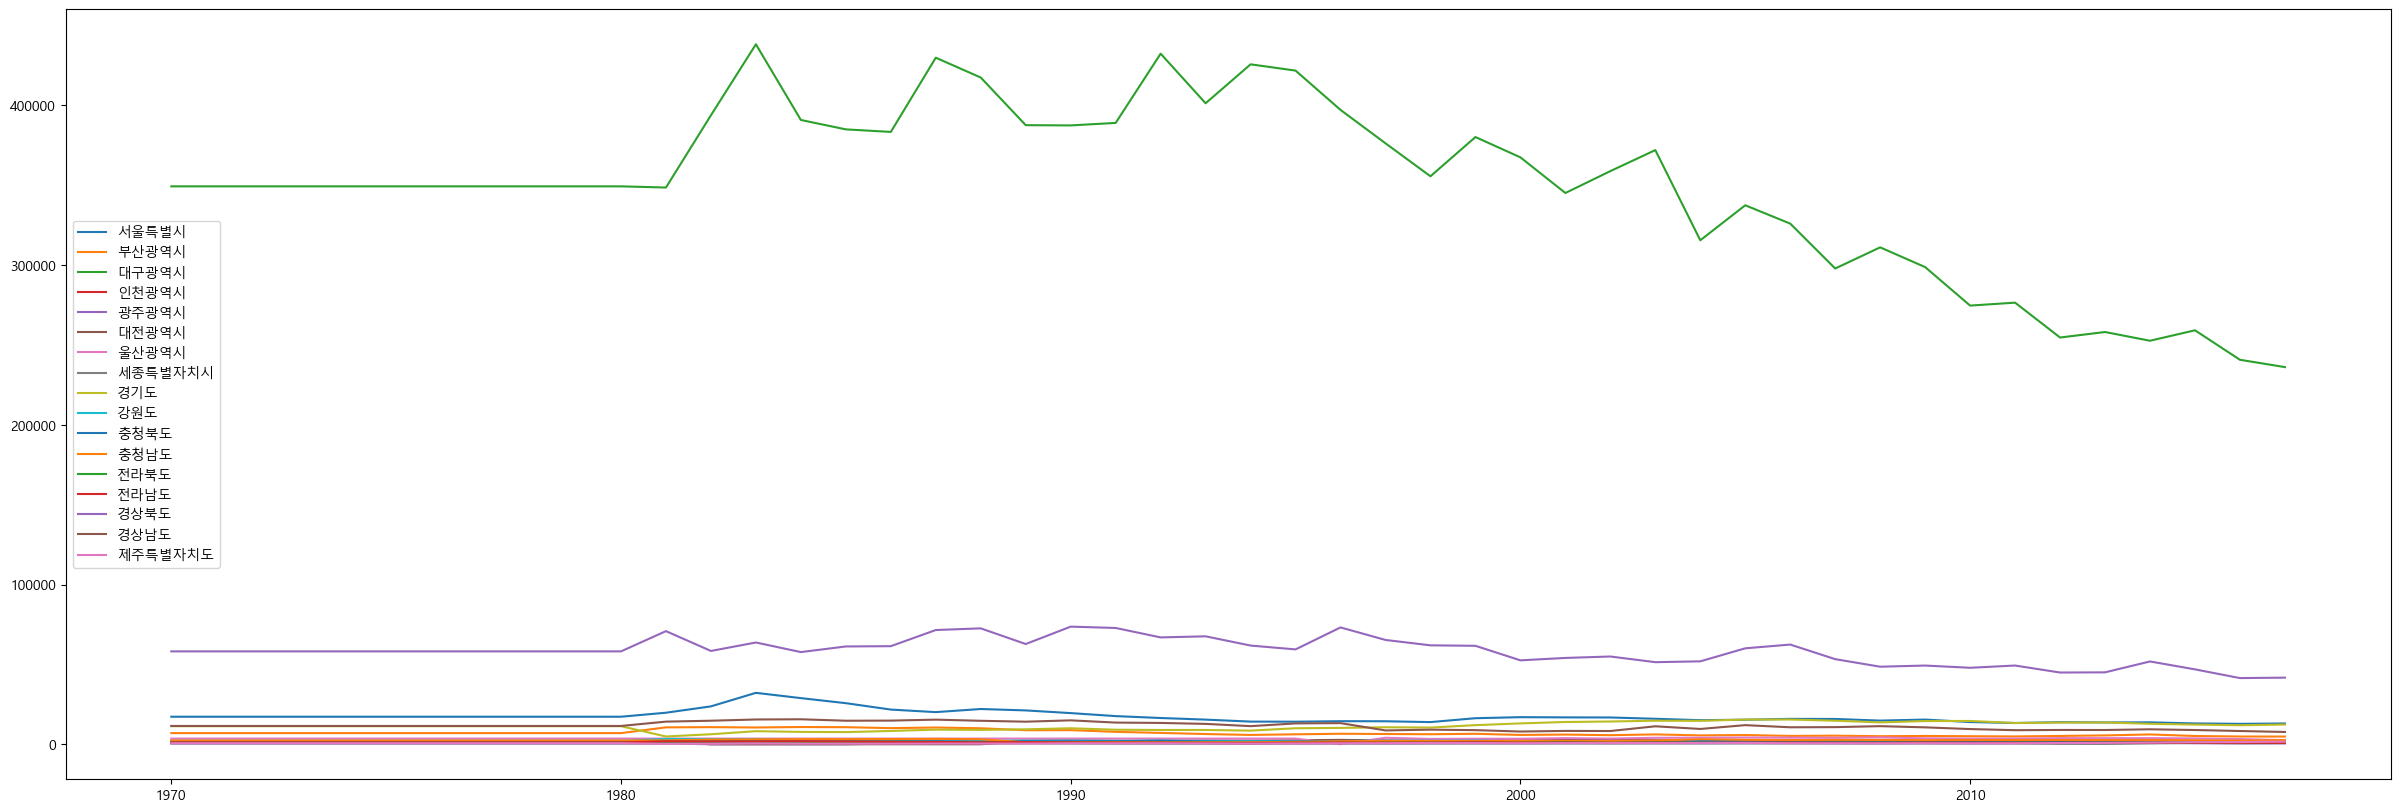

In [1072]:
plt.figure(figsize = (30, 10))

for i in range(len(data3.index)):
    plt.plot(data3.iloc[i], label = data3.index[i])


plt.legend()
plt.show()

- 대구에서의 이동이 가장 많고, 다른 지역으로의 전출은 같은 경상도나 서울을 위주로 이동하고 있다.

In [1073]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 324 entries, ('전국', '전국') to ('제주특별자치도', '제주특별자치도')
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1970    324 non-null    object
 1   1971    324 non-null    object
 2   1972    324 non-null    object
 3   1973    324 non-null    object
 4   1974    324 non-null    object
 5   1975    324 non-null    object
 6   1976    324 non-null    object
 7   1977    324 non-null    object
 8   1978    324 non-null    object
 9   1979    324 non-null    object
 10  1980    324 non-null    object
 11  1981    324 non-null    object
 12  1982    324 non-null    object
 13  1983    324 non-null    object
 14  1984    321 non-null    object
 15  1985    321 non-null    object
 16  1986    321 non-null    object
 17  1987    324 non-null    object
 18  1988    324 non-null    object
 19  1989    324 non-null    object
 20  1990    324 non-null    object
 21  1991    324 non-null    object
 

In [1075]:
data3 = data2.loc["전국"]
data3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
대구광역시,-,-,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
인천광역시,-,-,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
광주광역시,-,-,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
대전광역시,-,-,-,-,-,-,-,-,-,-,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
울산광역시,-,-,-,-,-,-,-,-,-,-,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,32784,23805,56526,83994,65052,82073


In [1077]:
data3.info()
data3.index

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국 to 제주특별자치도
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1970    18 non-null     object
 1   1971    18 non-null     object
 2   1972    18 non-null     object
 3   1973    18 non-null     object
 4   1974    18 non-null     object
 5   1975    18 non-null     object
 6   1976    18 non-null     object
 7   1977    18 non-null     object
 8   1978    18 non-null     object
 9   1979    18 non-null     object
 10  1980    18 non-null     object
 11  1981    18 non-null     object
 12  1982    18 non-null     object
 13  1983    18 non-null     object
 14  1984    18 non-null     object
 15  1985    18 non-null     object
 16  1986    18 non-null     object
 17  1987    18 non-null     object
 18  1988    18 non-null     object
 19  1989    18 non-null     object
 20  1990    18 non-null     object
 21  1991    18 non-null     object
 22  1992    18 non-null     obj

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지별')

In [1078]:
data3.replace("-", np.nan, inplace = True)

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\2962125746.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3.replace("-", np.nan, inplace = True)
C:\Users\KDP-2\AppData\Local\Temp\ipykernel_5744\2962125746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.replace("-", np.nan, inplace = True)


In [1081]:
data3.fillna(0, inplace = True)
data3 = data3.astype("int64")
data3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
대구광역시,0,0,0,0,0,0,0,0,0,0,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
인천광역시,0,0,0,0,0,0,0,0,0,0,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
광주광역시,0,0,0,0,0,0,0,0,0,0,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138
대전광역시,0,0,0,0,0,0,0,0,0,0,...,263532,252424,262432,264244,239635,230858,239559,220774,219252,211449
울산광역시,0,0,0,0,0,0,0,0,0,0,...,181662,159953,161146,164963,161433,159492,176015,170393,148190,135199
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,32784,23805,56526,83994,65052,82073


In [1082]:
data3.drop("전국", inplace = True)

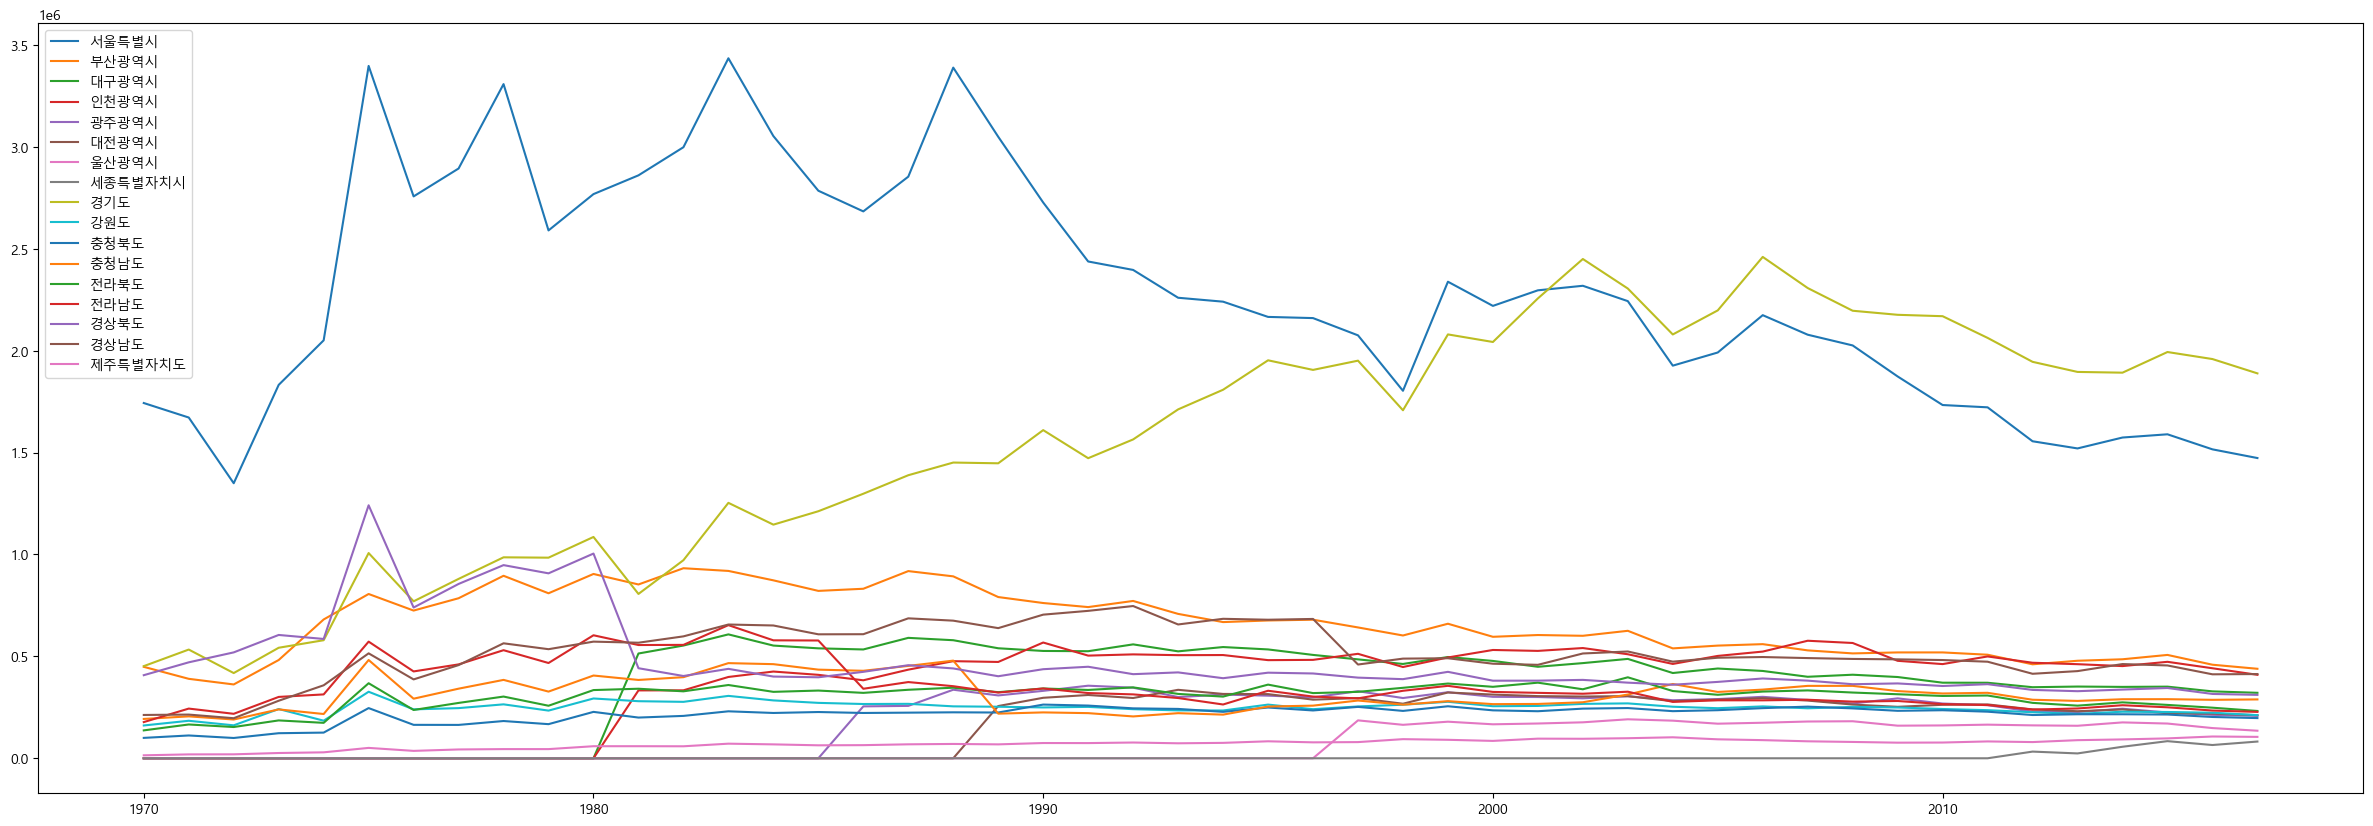

In [1085]:
plt.figure(figsize = (30, 10))
for i in range(len(data3)):
    plt.plot(data3.iloc[i], label = data3.index[i])

plt.legend()

- 2000년대 초반까지는 서울로의 이동자 수가 가장 많았지만, 그 이후로는 경기도로 이동하는 이동자 수가 많아졌다.
- 이는 2002년부터 서울의 집값이 30% 가량 오르는 폭등이 원인으로 추정된다.